0. Introducción

El presente proyecto de Ciencia de Datos, dispone estructuradamente todos los pasos para la generación de un Modelo Predictivo de Deep Learning.

El Modelo constará en primera instancia de una Red Neuronal Simple para posteriormente contrastarla con una Red Neuronal Convolucional Multicapa.

Se presenta un Dataset de Imágenes, el cual dispuesto a través de Vectores, permitirá realizar un Análisis Exploratorio de Datos detallado, el cual explicará en gran medida como se procesa información No estructurada (Imágenes) a través de Patrones Estructurados (Tensores), los cuales serán el Input y Output de la Red Neuronal, la cual intentará predecir un número (0-9) analizando diferentes Imágenes con Números a Través del Método de Convolución con Kernels.

Posteriormente, se dispondrán los pasos de Definición de Red, Entrenamiento del Modelo, Evaluación del Modelo y Visualización de Resultados, constrastando una Red Neuronal Simple, basada en un Modelo de Regresión Lineal con una Red Neuronal Convolucional Multicapa con Función de Activación ReLU, a través de Parámetros como Pérdida y Asertividad en Entrenamiento y Testeo.

1. Importar Librerías

In [60]:
import torch
from torch import nn
from torch.utils import data
from torch.utils.data import DataLoader, TensorDataset
import torchvision
from torchvision import transforms, datasets
from IPython import display
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image, ImageDraw
import seaborn as sns
import torch.optim as optim

2. Obtención de Datos

In [48]:
# Cargar el dataset de MNIST
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Aplanar las imágenes de 28x28 a vectores de 784 elementos
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Convertir las etiquetas a matrices de una columna
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

df_X_train = pd.DataFrame(X_train)
df_y_train = pd.DataFrame(y_train)
df_X_test = pd.DataFrame(X_test)
df_y_test = pd.DataFrame(y_test)

In [49]:
# Representación Imágenes con Vectores de 28x28 Dimensiones.
df_X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 784 entries, 0 to 783
dtypes: uint8(784)
memory usage: 44.9 MB


In [50]:
# Variable Target (Objetivo)
df_y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       60000 non-null  uint8
dtypes: uint8(1)
memory usage: 58.7 KB


No se detectan Valores Nulos.

In [51]:
df_X_train.shape

(60000, 784)

In [52]:
df_y_train.shape

(60000, 1)

In [97]:
print(df_X_train[:-5])
print(df_y_train[:-5])

     0    1    2    3    4    5    6    7    8    9    ...  774  775  776  \
0      1    0    1    1    1    1    1    1    1    0  ...    1    1    1   
1      0    0    1    0    0    0    1    1    0    0  ...    0    0    0   
2      0    1    1    0    1    0    1    0    1    1  ...    0    0    1   
3      0    0    1    1    1    1    0    0    1    1  ...    0    1    0   
4      0    1    1    0    0    1    0    0    1    0  ...    1    1    1   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
990    0    1    1    0    1    1    0    0    0    0  ...    0    0    0   
991    0    0    1    0    1    0    0    0    0    0  ...    0    1    1   
992    1    1    0    0    0    0    1    1    0    0  ...    0    1    1   
993    0    1    0    1    0    1    0    0    0    0  ...    0    1    0   
994    1    0    0    1    0    0    0    0    0    1  ...    1    0    1   

     777  778  779  780  781  782  783  
0      1    1    1    1    0    1 

3. Equilibrio Muestra

In [54]:
(((df_y_train.value_counts())/len(df_y_train))*100).round(1).sort_index(ascending = True)

,count
0,
0,9.9
1,11.2
2,9.9
3,10.2
4,9.7
5,9.0
6,9.9
7,10.4
8,9.8


Muestra visiblemente equilibrada para la variable Target, lo cual podría evitar de sobremanera el Overfitting al Pasar de Train a Test.

4. Análisis Exploratorio de Datos

In [95]:
# Estadística Descriptiva Vectores
df_X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,0.507000,0.521000,0.485000,0.481000,0.523000,0.495000,0.493000,0.499000,0.496000,0.501000,...,0.495000,0.499000,0.531000,0.491000,0.515000,0.526000,0.51000,0.511000,0.458000,0.494000
std,0.500201,0.499809,0.500025,0.499889,0.499721,0.500225,0.500201,0.500249,0.500234,0.500249,...,0.500225,0.500249,0.499288,0.500169,0.500025,0.499573,0.50015,0.500129,0.498482,0.500214
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [96]:
# Estadistica Descriptiva Variable Objetivo.
df_y_train.describe()

,0
count,60000.000000
mean,4.453933
std,2.889270
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,9.000000


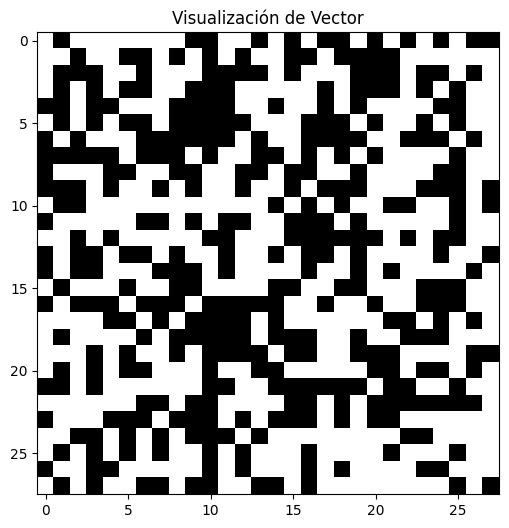

In [91]:
# Seleccionamos el Vector de un Registro.
vector = df_X_train.iloc[0].values

# Reshape el vector a una matriz de 28x28
imagen = vector.reshape(28, 28)

# Visualizar la imagen en escala de grises
plt.figure(figsize=(6,6))
plt.imshow(imagen, cmap='gray')
plt.title('Visualización de Vector')
plt.show()

In [92]:
df_y_train.iloc[0]

,0
0,5


Cada valor del Vector generado, es representado como un Píxel en una Imagen, donde los valores de 1 se muestran como Píxeles Blancos y los valores de 0 como Píxeles Negros, considerando un cuadrado perfecto de 784 Pixeles (28x28).

En general, la visualización a través de Vectores No es muy clara, la Visualización a través de Tensores debería ser más amigable a la vista.

5. Preprocesamiento y Visualización

In [27]:
# Cargar el dataset de MNIST
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizamos los pixeles de las imágenes (0-255), escalándolas entre 0 y 1.
X_train, X_test = X_train / 255.0, X_test / 255.0

# Función para visualizar múltiples muestras de datos
def visualize_samples(X, y, indices):
    fig, axes = plt.subplots(1, len(indices), figsize=(10, 2))
    for i, index in enumerate(indices):
        axes[i].imshow(X[index], cmap='gray')
        axes[i].set_title(f'Target: {y[index]}')
        axes[i].axis('off')
    plt.show()

# Dimensiones Conjunto de Entrenamiento y Prueba
print(f"Tamaño Entrenamiento: {X_train.shape}")
print(f"Tamaño Prueba: {X_test.shape}")


Tamaño Entrenamiento: (60000, 28, 28)
Tamaño Prueba: (10000, 28, 28)


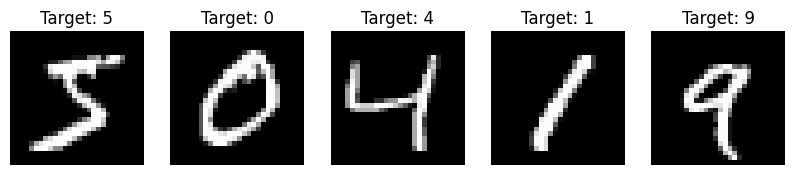

In [28]:
# Visualizar una muestra de datos del conjunto de Entrenamiento
sample_indices = [0, 1, 2, 3, 4]
visualize_samples(X_train, y_train, sample_indices)

In [29]:
# Convertimos las Imágenes en Tensores.
X_train = torch.tensor(X_train).unsqueeze(1).float()
X_test = torch.tensor(X_test).unsqueeze(1).float()
y_train = torch.tensor(y_train).long()
y_test = torch.tensor(y_test).long()

# Se crean los Cargadores de Datos para Entrenamiento y Prueba.
train_loader = data.DataLoader(data.TensorDataset(X_train, y_train), batch_size=64, shuffle=True)
test_loader = data.DataLoader(data.TensorDataset(X_test, y_test), batch_size=64, shuffle=False)

70.000 Imágenes de dígitos escritos a mano, del 0 al 9. Cada imagen es de 28x28 pixeles en escala de grises.

Los tensores facilitan la transformación de datos a través de métodos como la normalización y la agrupación, lo que es esencial para preparar los datos antes de alimentar a la red neuronal.

Por otro lado, durante el entrenamiento de modelos de Deep Learning, los Tensores se utilizan para almacenar los Pesos y Sesgos de las Redes Neuronales, así como para calcular Gradientes durante la Retropropagación.

6. Red Neuronal Simple

6.1 Regresión Lineal

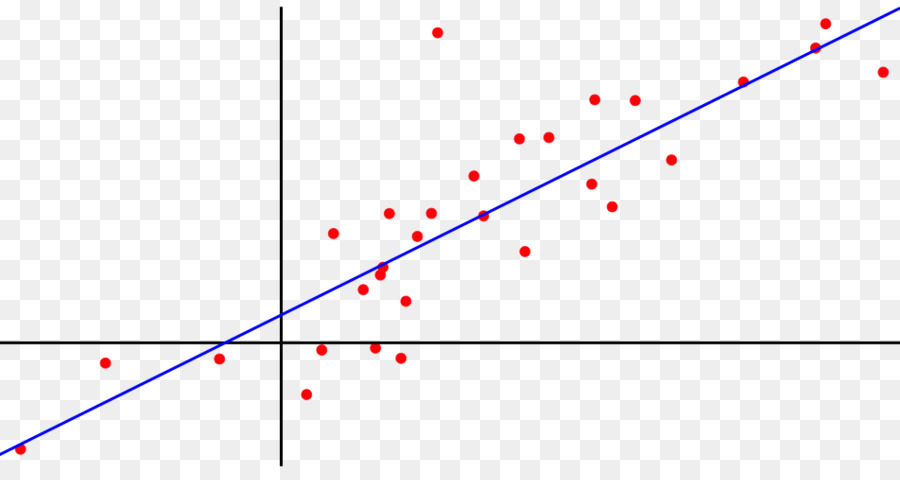

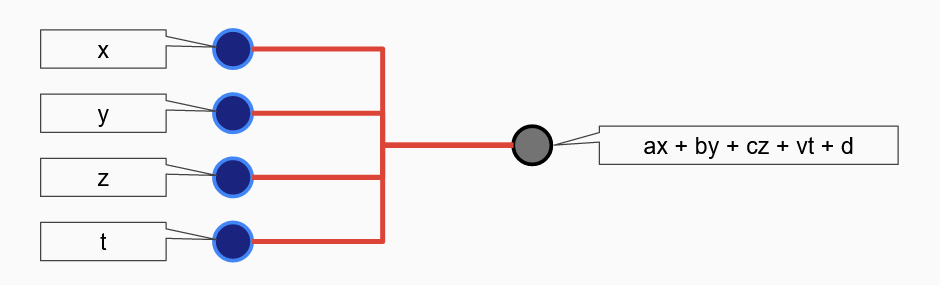

La Regresión Lineal por Medio de Sumas y Productos, busca relacionar las Variables Independientes (Características) con la Variable Dependiente (Target) Objetivo.

Suele ser representada a través de la Ecuación de la Recta.

6.2 Definición de la Red.

In [30]:
# Definimos la Red Neuronal Simple, basada en una Regresión Lineal.
# nn.Linear(n_entradas, n_salidas)

class LinearNN(nn.Module):
    def __init__(self):
        super(LinearNN, self).__init__()
        self.linear = nn.Linear(28*28, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.linear(x)
        return x

$$\mathbf{y} = \mathbf{Xw} + b$$

y: Variable Objetivo

X: Variable Independiente (Predictora).

w: Coeficientes de regresión (influencia de cada variable independiente en la variable dependiente).

b: Sesgo o Intercepto. (Valor de y cuando todas las Variables Independientes son Cero.)

6.3 Creación del Modelo.

In [31]:
# Creamos el Modelo, definimos la Función de Pérdida y el Optimizador
# Se utiliza el Optimizador Adam por su eficiencia Computacional y Capacidad de Manejar Problemas con Gradientes Ruidosos.
# Se Utiliza la Función nn.CrossEntropyLoss, la cual es muy eficiente para problemas de Clasificación.
model = LinearNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr  = 0.001)

6.3 Entrenamiento de la Red.

In [32]:
# Entrenamos la Red.
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train

    model.eval()
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_accuracy = 100 * correct_test / total_test

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}, Train Accuracy: {train_accuracy}%, Test Accuracy: {test_accuracy}%")

Epoch 1/10, Loss: 0.5433889670825717, Train Accuracy: 86.89166666666667%, Test Accuracy: 91.01%
Epoch 2/10, Loss: 0.3231561630328835, Train Accuracy: 91.02833333333334%, Test Accuracy: 92.02%
Epoch 3/10, Loss: 0.29522435852427725, Train Accuracy: 91.77666666666667%, Test Accuracy: 92.21%
Epoch 4/10, Loss: 0.28141963101430995, Train Accuracy: 92.17333333333333%, Test Accuracy: 92.44%
Epoch 5/10, Loss: 0.2736825575865408, Train Accuracy: 92.37333333333333%, Test Accuracy: 92.31%
Epoch 6/10, Loss: 0.26785228928841, Train Accuracy: 92.61666666666666%, Test Accuracy: 92.66%
Epoch 7/10, Loss: 0.26367213846301474, Train Accuracy: 92.67166666666667%, Test Accuracy: 92.49%
Epoch 8/10, Loss: 0.26040006685120337, Train Accuracy: 92.77%, Test Accuracy: 92.7%
Epoch 9/10, Loss: 0.25734640365597533, Train Accuracy: 92.89%, Test Accuracy: 92.65%
Epoch 10/10, Loss: 0.25506817945030963, Train Accuracy: 92.99166666666666%, Test Accuracy: 92.68%


Luego de Analizar el comportamiento de los parámetros a lo largo de las Épocas, se observa que que el valor de Pérdida va disminuyendo a medida que se va entrenando, cerrando gradualmente la brecha entre los valores predichos y los reales, por otro lado, las precisiones en entrenamiento y test son bastante altas.

En otras palabras, el modelo es preciso y exacto a la vez, ya que no existe una gran diferencia entre Entrenamiento y Testeo.

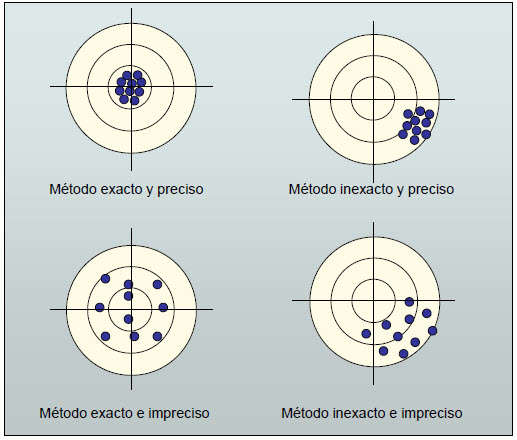

7. Red Neuronal Convulucional Multicapa

7.1 Función de Activación ReLU

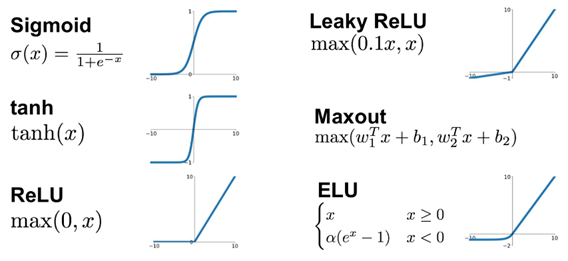

### ReLU

$$\operatorname{ReLU}(x) = \max(0, x)$$


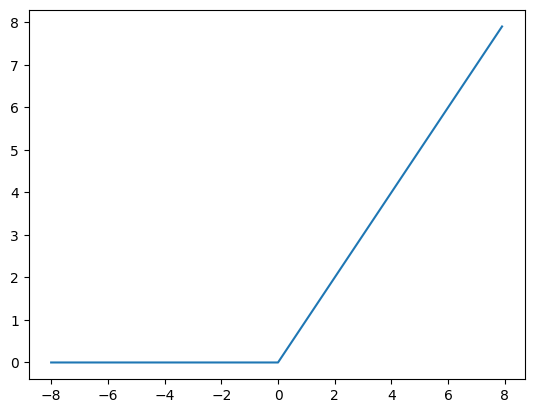

In [33]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
plt.plot(x.detach(), y.detach())

Seleccionamos la Función de Activación ReLU, debido a su capacidad para procesar rápidamente los datos en entrenamiento, su eficiencia computacional y su habilidad para manejar patrones complejos en los datos.

Cualquier Valor Negativo se establece en 0, y los valores positivos se mantienen sin cambios. Esto reduce la carga computacional en comparación con otras funciones de activación que requieren operaciones más complejas como exponenciales o multiplicaciones.

7.2 Definición de la Red

In [38]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.softmax(self.fc2(x))
        return x

Se define una Red con dos capas Convolucionales seguidas de una Capa de Pooling (Agrupación), y posteriormente dos Capas Completamente Conectadas.

La función de activación Relu se usa después de cada Capa convolucional y Completamente Conectada, mientras que la Función de Activación (SoftMax), se utiliza en la Capa de Salida, permitiendo realizar una Clasificación Multiclase a través de Probabilidades.

7.3 Creación del Modelo

In [40]:
# Inicializar la Red, Función de Pérdida y Optimizador
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

Misma Función de Pérdida y Optimizador que en Red Neuronal Simple.

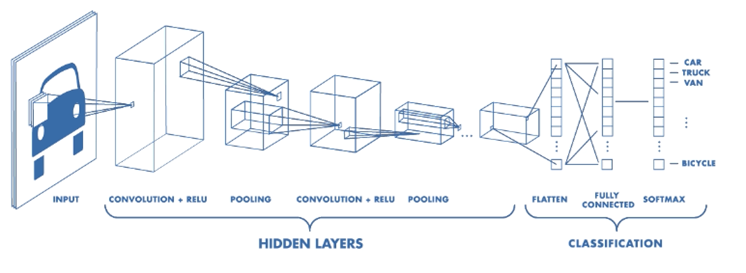

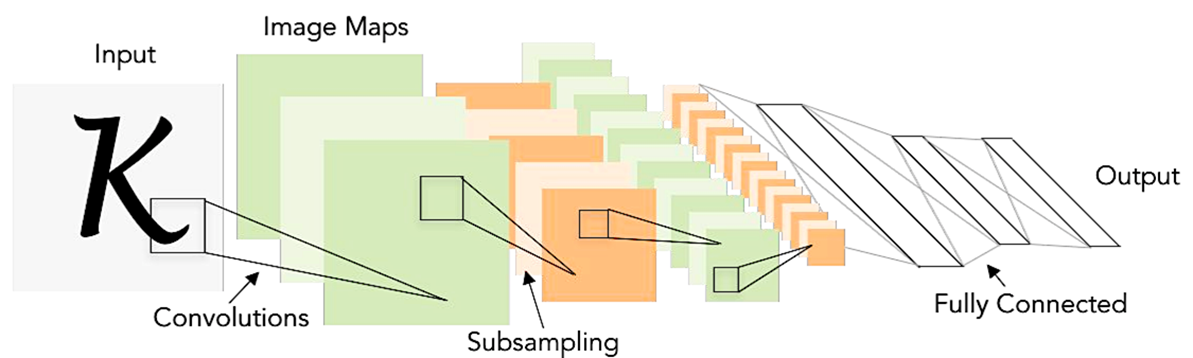

7.4 Entrenamiento del Modelo

In [42]:
def train_model(model, train_loader, test_loader, criterion, optimizer, epochs):
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_accuracy = 100 * correct_train / total_train

        model.eval()
        correct_test = 0
        total_test = 0
        with torch.no_grad():
            for images, labels in test_loader:
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total_test += labels.size(0)
                correct_test += (predicted == labels).sum().item()

        test_accuracy = 100 * correct_test / total_test

        print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%')

 Durante cada Época (Epoch), el modelo se entrena con el conjunto de Datos de Entrenamiento, calculando la Pérdida y ajustando los Pesos y Sesgos mediante Retropropagación, lo cual a su vez permite minimizar la pérdida y mejorar el redimiento del modelo.

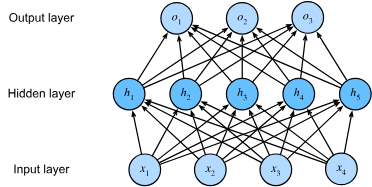

Pasos Retropropagación:

1. Paso Hacia Adelante: En esta etapa, los datos de entrada se pasan a través de la red neuronal, capa por capa, hasta generar una salida. Esta salida se compara con el valor esperado (etiqueta verdadera) y se calcula la pérdida utilizando una función de pérdida, como la entropía cruzada o el error cuadrático medio.

2. Cálculo de Gradiente: La retropropagación utiliza la regla de la cadena para calcular el gradiente de la función de pérdida con respecto a cada peso y sesgo en la red. Este gradiente indica la dirección y magnitud del cambio necesario para reducir la pérdida.

3. Paso Hacia Atrás: En esta etapa, el gradiente de error se propaga hacia atrás a través de la red, comenzando desde la capa de salida y avanzando hacia la capa de entrada. En cada capa, el gradiente de error se utiliza para actualizar los pesos y sesgos.

4. Actualización de Pesos y Sesgos: Los pesos y sesgos se ajustan utilizando un algoritmo de optimización, como el descenso de gradiente. Este algoritmo actualiza los pesos y sesgos en la dirección opuesta al gradiente, con el objetivo de minimizar la función de pérdida.

7.5 Evaluación del Modelo

In [43]:
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy: {100 * correct / total:.2f}%')

Se evalúa el rendimiento del modelo en el conjunto de datos de prueba. Se calcula la precisión del modelo comparando las predicciones vs las etiquetas reales.

7.6 Visualización Resultados

In [44]:
def visualize_results(model, test_loader):
    model.eval()
    images, labels = next(iter(test_loader))
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    fig = plt.figure(figsize=(12, 8))
    for i in range(6):
        ax = fig.add_subplot(2, 3, i+1, xticks=[], yticks=[])
        plt.imshow(images[i].squeeze(), cmap='gray')
        ax.set_title(f'Predicted: {predicted[i].item()}')
    plt.show()

7.6 Entrenamiento y Evaluación del Modelo

Epoch [1/10], Loss: 1.6388, Train Accuracy: 82.51%, Test Accuracy: 87.84%
Epoch [2/10], Loss: 1.5826, Train Accuracy: 87.85%, Test Accuracy: 88.43%
Epoch [3/10], Loss: 1.5045, Train Accuracy: 95.72%, Test Accuracy: 97.81%
Epoch [4/10], Loss: 1.4770, Train Accuracy: 98.49%, Test Accuracy: 98.86%
Epoch [5/10], Loss: 1.4737, Train Accuracy: 98.79%, Test Accuracy: 98.77%
Epoch [6/10], Loss: 1.4724, Train Accuracy: 98.90%, Test Accuracy: 98.18%
Epoch [7/10], Loss: 1.4720, Train Accuracy: 98.94%, Test Accuracy: 98.75%
Epoch [8/10], Loss: 1.4705, Train Accuracy: 99.09%, Test Accuracy: 98.85%
Epoch [9/10], Loss: 1.4695, Train Accuracy: 99.19%, Test Accuracy: 98.61%
Epoch [10/10], Loss: 1.4685, Train Accuracy: 99.27%, Test Accuracy: 98.98%
Accuracy: 98.98%


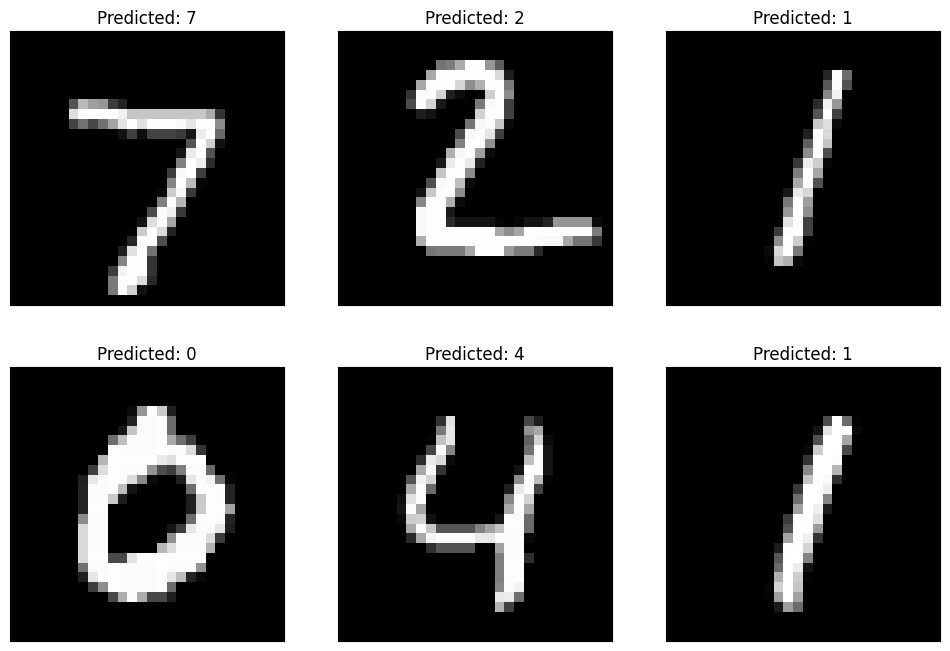

In [45]:
epochs = 10
train_model(model, train_loader, test_loader, criterion, optimizer, epochs)
evaluate_model(model, test_loader)
visualize_results(model, test_loader)

Se entrena el Modelo de acuerdo al N° de Épocas que indique el usuario final. En cada una de ellas se evalúa la pérdida y precisión del modelo en los conjuntos de Entrenamiento y Pruebas. También se visualizan algunos resultados.

En general la Red Neuronal Multicapa tiene un rendimiento superior en términos de precisión, pero también muestra signos de sobreajuste, evidenciado en los valores de Asertividad Mayores en Testeo que en Entrenamiento. La Red Neuronal Simple, aunque tiene una precisión ligeramente menor, parece generalizar mejor los datos de prueba.

---------------------------------------------------------------------------

8. Conclusiones y Recomendaciones

8.1